<div align="center">
<a href="https://vbti.nl"><img src="images/vbti_logo.png" width="400"></a>
</div>

# Convolutional Neural Networks
This notebook supports the 'Convolutional Neural Network' chapter of the [1-day masterclass "Deep Learning"](https://aiblog.nl/masterclass-deep-learning). It is not ment as a full course on deep learning, but rather gives you a flavor of the topic. For an in-depth AI training or consultancy please contact [VBTI](https://vbti.nl). 

Convolutional Neural Networks are a special type or Artificial Neural Networks. They are optimized to process image data. During the masterclass the details of convolution/maxpooling layers and CNN architectures are explained. In this notebook you will build and train an ANN to recognize objects in images.

<div align="center">
<a href="https://aiblog.nl/masterclass-deep-learning"><img src="images/cnn.png" width="400"></a>
</div>

In [1]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
In this example the well known Cifar10 dataset is used. The datasets consists of 60,000 images of objects from 10 classes. The challenge is to train a neural network that labels each image with the object class. To train the neural network 50,000 images are used. The remaining 10,000 images are used to validate the performance of the neural network.

First the data is imported and scaled so the neural network can handle the data.

In [2]:
from keras.datasets import cifar10

# load data
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

# scale data
x_train, x_val = x_train / 255.0, x_val / 255.0

# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

Using TensorFlow backend.


170500096/170498071 [==============================] - 152s 1us/step


((50000, 32, 32, 3),
 (50000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 dtype('float64'),
 dtype('uint8'))

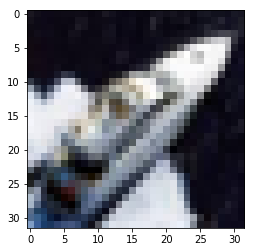

In [3]:
# plot a sample point
plt.imshow(x_train[20000])

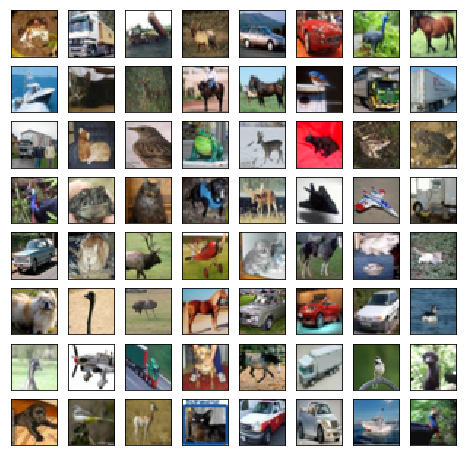

In [4]:
# plot first few numbers
nrows, ncols = 8, 8
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
axs = axs.ravel() 
for i in range(nrows*ncols):
    axs[i].imshow(x_train[i])
    axs[i].set(xticks=[], yticks=[])

In [5]:
# reformat target vector from categorical label to one-hot-encoding
from keras import utils

# reformat labels to one-hot-encoded labels
print('Before y_train[0] = {}'.format(y_train[0]))
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
print('After y_train[0] = {}'.format(y_train[0]))

Before y_train[0] = [6]
After y_train[0] = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Build neural network
A neural network can be build in two step. First the topology of the neural network is defined. This contains o.a. the number of layers, number of nodes (neurons) per layer and type of activation function. Next, a loss function and optimization function need to be defined. The [Keras](https://keras.io) framework is used for programming the neural network.

In [6]:
from keras import models
from keras import layers
from keras import optimizers

# define model topology
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# define model optimization method
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['categorical_accuracy'])

In [7]:
# print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                10260     
__________

# Train neural network

In [8]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 21s 419us/step - loss: 0.2528 - categorical_accuracy: 0.3770 - val_loss: 0.2180 - val_categorical_accuracy: 0.4866
Epoch 2/20
50000/50000 [==============================] - 18s 364us/step - loss: 0.2115 - categorical_accuracy: 0.5072 - val_loss: 0.2035 - val_categorical_accuracy: 0.5232
Epoch 3/20
50000/50000 [==============================] - 18s 360us/step - loss: 0.1965 - categorical_accuracy: 0.5489 - val_loss: 0.1906 - val_categorical_accuracy: 0.5681
Epoch 4/20
50000/50000 [==============================] - 19s 376us/step - loss: 0.1852 - categorical_accuracy: 0.5809 - val_loss: 0.1806 - val_categorical_accuracy: 0.5966
Epoch 5/20
50000/50000 [==============================] - 18s 364us/step - loss: 0.1769 - categorical_accuracy: 0.6060 - val_loss: 0.1794 - val_categorical_accuracy: 0.5983
Epoch 6/20
50000/50000 [==============================] - 19s 381us/step - loss: 0.16

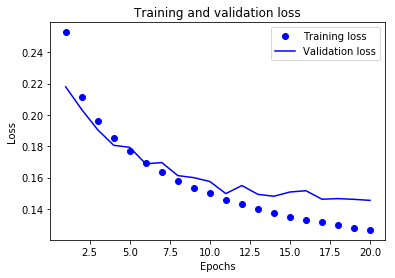

In [9]:
# plot training loss history
history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values  = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

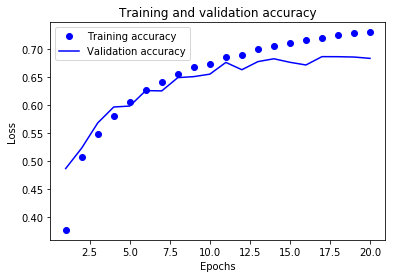

In [10]:
# plot training accuracy history
history_dict = history.history
loss_values  = history_dict['categorical_accuracy']
val_loss_values  = history_dict['val_categorical_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

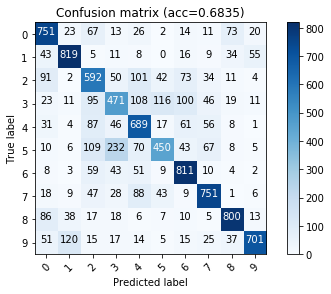

In [11]:
# Evaluate performance of model by plotting confusion matrix
from sklearn.metrics import confusion_matrix

# see http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

    

# predict labels from validation set
y_pred = model.predict(x_val)

# convert data to label number
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# plot the confusion matrix
plot_confusion_matrix(cm, 
                      title='Confusion matrix (acc={})'.format(accuracy(y_true, y_pred)), 
                      classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# How to go further from here?
This notebook provides a basic processing pipeline for building a CNN that objects in images. Experiment a little bit yourself by changing the number of layers, kernel sizes, number of epochs and learning rate. Try to increase the accuracy of the model.

## Hint
By adding more convolutional layers the CNN is able to learn more abstract features from images. This could increase its accuracy.